# Statistical Learning Project Census Data

## Load the Data and Initial Exploration

In [55]:

import pandas as pd

# Load the adult.data file
data_file_path = 'census+income/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
           'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
data_df = pd.read_csv(data_file_path, names=columns, sep=',\s', na_values="?", engine='python')

# Display the first few rows of the dataset
data_df.head(7)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


*   It contains 15 columns, including demographic, work-related, and income information.
*   The columns are: `age`, `workclass`, `fnlwgt` (final weight), `education`, `education_num` (education number), `marital_status`, `occupation`, `relationship`, `race`, `sex`, `capital_gain`, `capital_loss`, `hours_per_week`, `native_country`, and `income`.
*   The `income` column, which is likely the target variable for predictive modeling, classifies individuals into two groups: `<=50K` and `>50K`.

In [60]:
# Load the adult.test file
test_file_path =  'census+income/adult.test'
# Skipping the first row as it might be a header or descriptive row based on common dataset patterns
test_df = pd.read_csv(test_file_path, names=columns, sep=',\s', na_values="?", engine='python', skiprows=1)

# Display the first few rows of the test dataset
test_df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


*   The `income` column values in the test dataset include a period (`.`) at the end (e.g., `<=50K.`, `>50K.`), unlike in the training dataset. This will need to be cleaned to ensure consistency between the two datasets.
*   There are missing values (`NaN`) in some columns, such as `workclass` and `occupation`, indicating that handling missing data will be an important part of the preprocessing.

## Data Cleaning and Preprocessing

Preliminary Analysis

In [61]:
# Summary statistics before cleaning and preprocessing
total_records = data_df.shape[0]
total_features = data_df.shape[1]
individuals_more_than_50k = data_df[data_df['income'] == '>50K'].shape[0]
individuals_at_most_50k = data_df[data_df['income'] == '<=50K'].shape[0]
percentage_more_than_50k = (individuals_more_than_50k / total_records) * 100

summary_before_cleaning = {
    "Total number of records": total_records,
    "Total number of features": total_features,
    "Individuals making more than $50k": individuals_more_than_50k,
    "Individuals making at most $50k": individuals_at_most_50k,
    "Percentage of individuals making more than $50k": percentage_more_than_50k,
}

summary_before_cleaning


{'Total number of records': 32537,
 'Total number of features': 14,
 'Individuals making more than $50k': 7839,
 'Individuals making at most $50k': 24698,
 'Percentage of individuals making more than $50k': 24.092571533945968}

In [63]:
# Step 2: Identify and Drop Unnecessary Columns
# Re-checking if 'education' column exists before attempting to drop
if 'education' in data_df.columns:
    data_df = data_df.drop(columns=['education'])
if 'education' in test_df.columns:
    test_df = test_df.drop(columns=['education'])

# Step 3: Remove Duplicates
data_df = data_df.drop_duplicates()
test_df = test_df.drop_duplicates()

# Step 4: Make Easier Access for Data by Dropping Spaces
data_df_dropped = data_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
test_df_dropped = test_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Step 5: Change Special Characters
# Making income column values consistent by removing periods
data_df['income'] = data_df_dropped['income'].str.replace('.', '')
test_df['income'] = test_df_dropped['income'].str.replace('.', '')



C:\Users\sapsh\AppData\Local\Temp\ipykernel_9784\727710006.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_df['income'] = data_df_dropped['income'].str.replace('.', '')
C:\Users\sapsh\AppData\Local\Temp\ipykernel_9784\727710006.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_df['income'] = test_df_dropped['income'].str.replace('.', '')


*   Total number of records: 32,537
*   Total number of features: 14 (after removing `education`)
*   Individuals making more than $50k: 7,839
*   Individuals making at most $50k: 24,698
*   Percentage of individuals making more than $50k: 24.09%

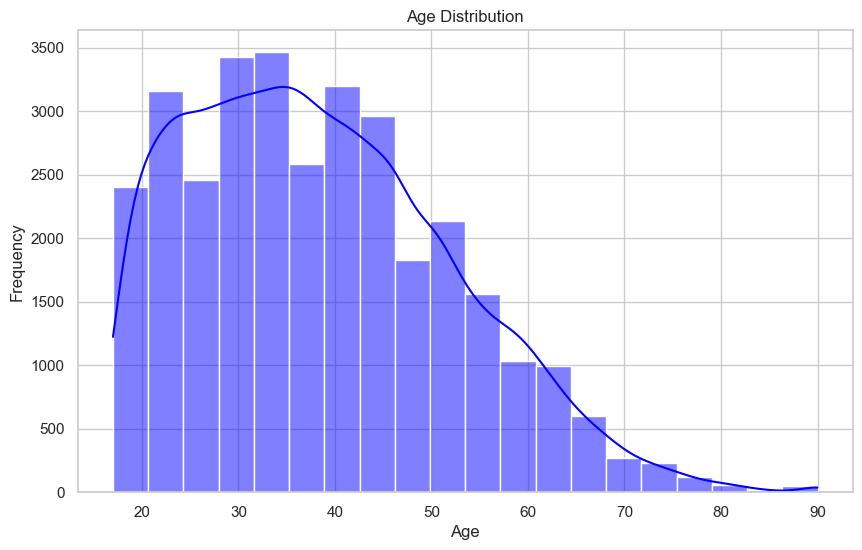

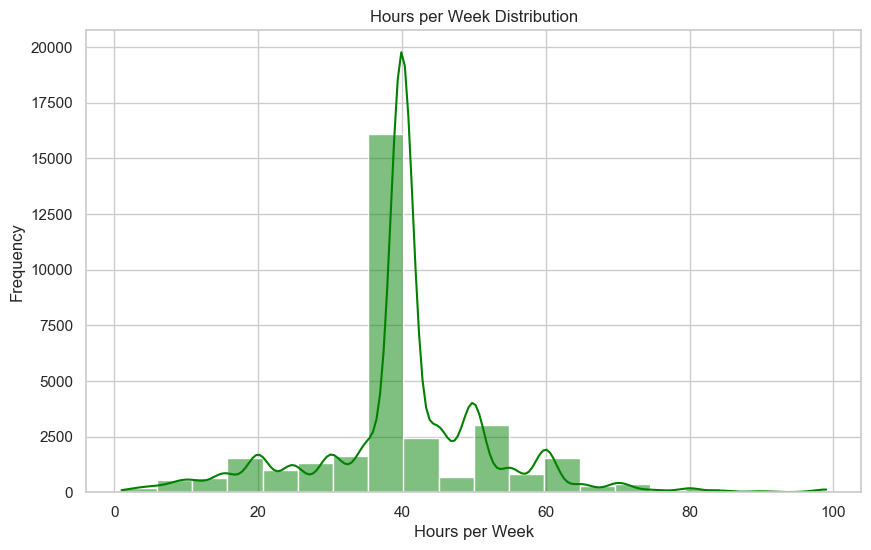

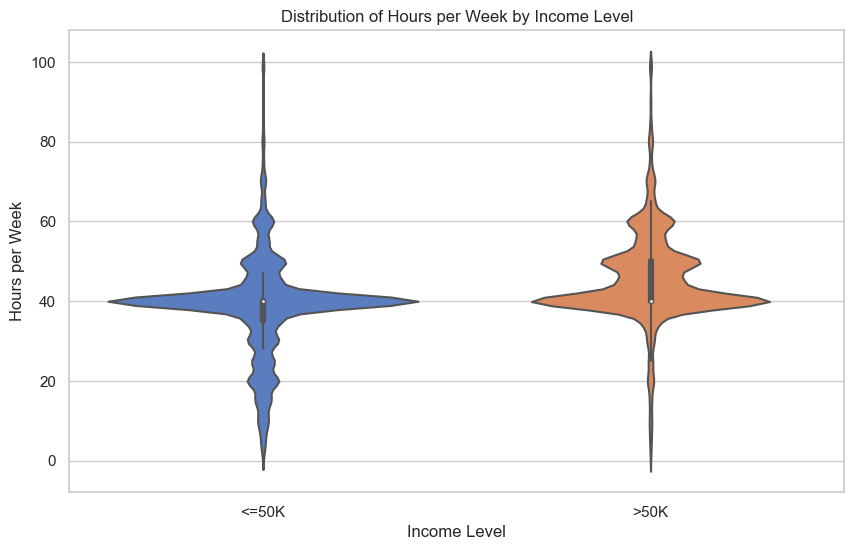

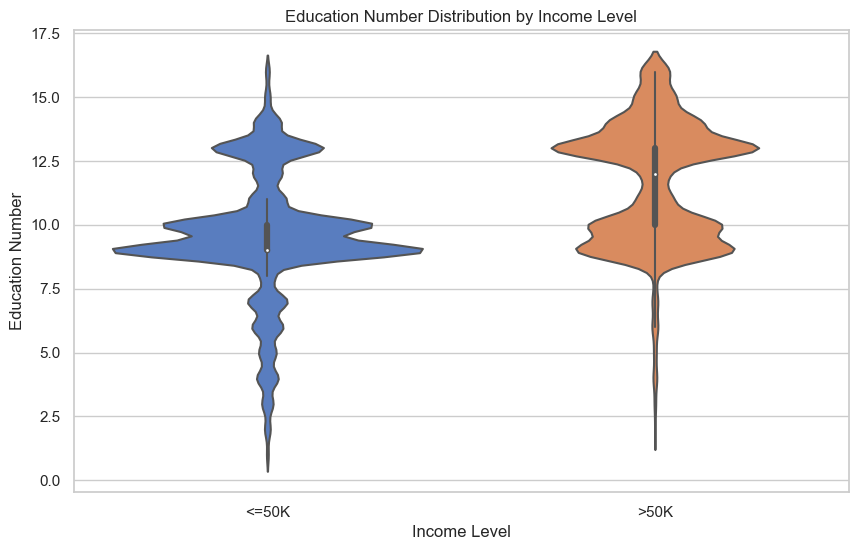

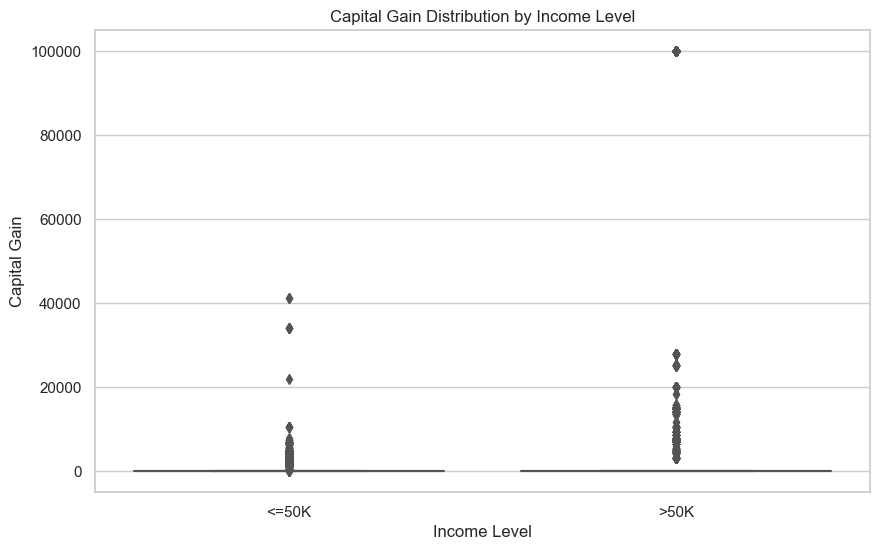

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Histogram of age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_df['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#  Histogram for Hours per Week
plt.figure(figsize=(10, 6))
sns.histplot(data_df['hours_per_week'], bins=20, kde=True, color='green')
plt.title('Hours per Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()


# 2. Violin Plot for hours per week across different income levels
plt.figure(figsize=(10, 6))
sns.violinplot(x='income', y='hours_per_week', data=data_df, palette='muted')
plt.title('Distribution of Hours per Week by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Hours per Week')
plt.show()

#  Violin Plot for Education Num vs. Income
plt.figure(figsize=(10, 6))
sns.violinplot(x='income', y='education_num', data=data_df, palette='muted')
plt.title('Education Number Distribution by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Education Number')
plt.show()

# 3. Side-by-side Box Plot for capital gain across income levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital_gain', data=data_df, palette='muted')
plt.title('Capital Gain Distribution by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Capital Gain')
plt.show()


*   **Age Distribution**: The histogram shows the distribution of ages within the dataset, revealing a right-skewed pattern where a majority of the individuals are younger (20-40 years old).
    
*   **Distribution of Hours per Week by Income Level**: The violin plot illustrates the distribution of hours worked per week, segmented by income level. It indicates that individuals making more than $50k tend to work more hours, with a median close to the full-time workweek (40 hours). The distribution for those making at most $50k is slightly wider, suggesting a broader range of work hours.
    
*   **Capital Gain Distribution by Income Level**: The box plot for capital gain across income levels shows a significant presence of outliers, particularly among individuals earning more than $50k. This suggests that capital gain might be a distinguishing feature between the two income groups, though the majority of individuals in both groups have no or very low capital gain.
*   **Hours per Week Distribution**: This histogram shows a strong peak around the 40-hour mark, indicative of a standard full-time work week, with tails extending towards both lower and higher hours. There's a significant concentration of individuals working standard full-time hours, but also a notable portion working fewer or more hours.
    
*   **Education Number Distribution by Income Level**: The violin plot illustrates the distribution of education levels (as measured by the number of years of education) across different income levels. It's evident that individuals with higher education levels tend to be more concentrated in the higher income bracket (`>50K`), suggesting a positive correlation between education and income.



In [65]:
# Identifying numerical and categorical columns
numerical_cols = data_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data_df.select_dtypes(include=['object']).columns.drop('income')

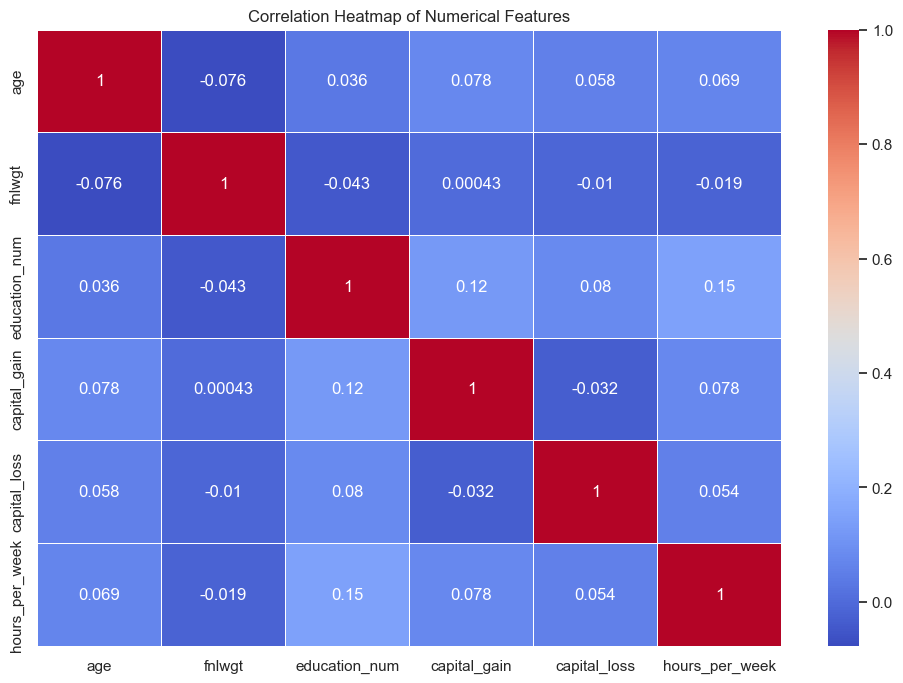

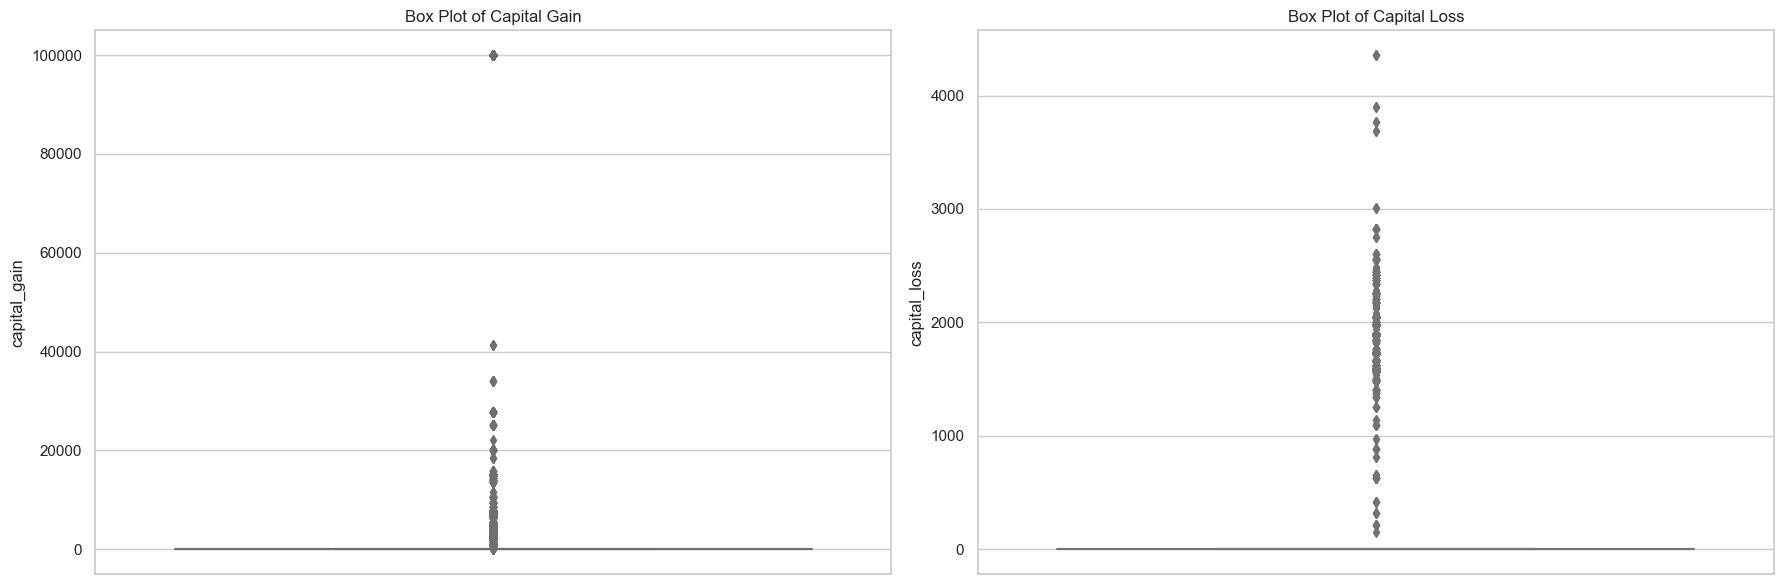

In [66]:
# Heatmap for Correlation Check among numerical features
correlation_matrix = data_df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Box Plot for Capital Gain and Capital Loss to check for outliers
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=data_df, y='capital_gain', ax=ax[0], color='skyblue')
ax[0].set_title('Box Plot of Capital Gain')

sns.boxplot(data=data_df, y='capital_loss', ax=ax[1], color='lightgreen')
ax[1].set_title('Box Plot of Capital Loss')

plt.tight_layout()
plt.show()


### Correlation Heatmap:

*   The heatmap shows the correlations among numerical features. Most features have low to moderate correlations with each other, suggesting minimal multicollinearity issues for models that assume independence between features. Notably, `education_num` shows some level of positive correlation with `age`, which could indicate that higher educational attainment is associated with older age groups within this dataset.

### Box Plots for Capital Gain and Capital Loss:

*   **Capital Gain**: The box plot reveals a significant number of outliers, with the bulk of data concentrated at 0. This indicates that capital gains are not common among most individuals in the dataset, but when they do occur, they can vary greatly in amount.
*   **Capital Loss**: Similar to capital gain, most individuals have no capital loss (`capital_loss` = 0), but there are outliers with varying amounts of loss

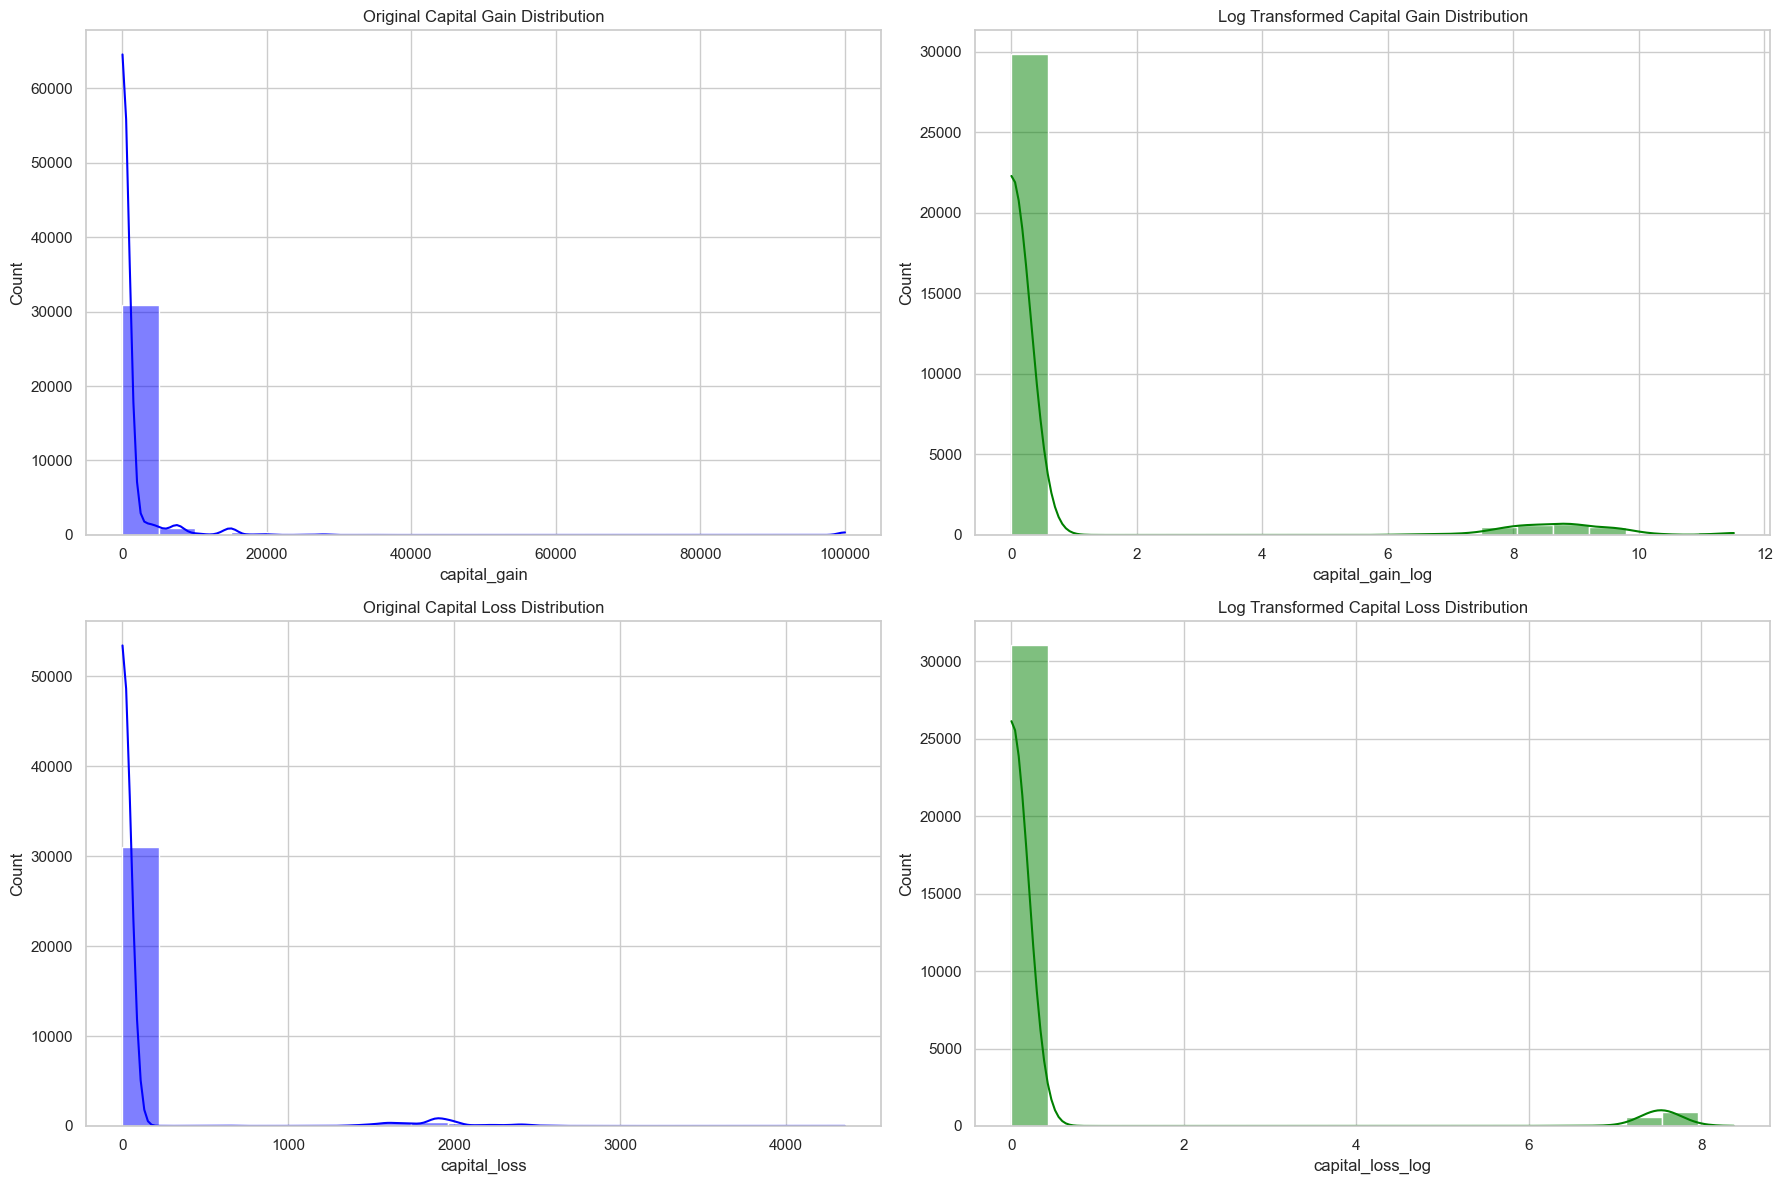

In [67]:
import numpy as np

# Applying log transformation to 'capital_gain' and 'capital_loss' by adding 1 to avoid log(0)
data_df['capital_gain_log'] = np.log(data_df['capital_gain'] + 1)
data_df['capital_loss_log'] = np.log(data_df['capital_loss'] + 1)

test_df['capital_gain_log'] = np.log(test_df['capital_gain'] + 1)
test_df['capital_loss_log'] = np.log(test_df['capital_loss'] + 1)

# Visualizing the transformed features to see the effect of the log transformation
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Original capital_gain distribution
sns.histplot(data_df['capital_gain'], bins=20, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Original Capital Gain Distribution')

# Transformed capital_gain_log distribution
sns.histplot(data_df['capital_gain_log'], bins=20, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Log Transformed Capital Gain Distribution')

# Original capital_loss distribution
sns.histplot(data_df['capital_loss'], bins=20, kde=True, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Original Capital Loss Distribution')

# Transformed capital_loss_log distribution
sns.histplot(data_df['capital_loss_log'], bins=20, kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title('Log Transformed Capital Loss Distribution')

plt.tight_layout()
plt.show()


In [68]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Creating transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Since high cardinality handling requires specific knowledge of which features are considered high cardinality,
# let's initially treat all categorical features with OneHotEncoder for simplicity
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fitting the ColumnTransformer to the training data
preprocessor.fit(data_df.drop('income', axis=1))  # Exclude target variable for fitting

# Transforming both training and test set
data_df_t = preprocessor.transform(data_df.drop('income', axis=1))
test_df_t = preprocessor.transform(test_df.drop('income', axis=1))

# The transformed data is now in a NumPy array format. To visualize and further process.


data_df_t.shape, test_df_t.shape


((32537, 89), (16276, 89))

The data has been successfully scaled and encoded, resulting in the following transformations:

*   The training set (`adult.data`) has been transformed into a format with 32,537 rows and 89 features after preprocessing.
*   The test set (`adult.test`) now aligns with the training set, having been transformed to have 16,276 rows and 89 features.

In [69]:
# Identifying outliers using the IQR method for selected numerical features
features_to_check = ['age', 'fnlwgt', 'education_num', 'capital_gain_log', 'capital_loss_log']
outlier_indices = []

for feature in features_to_check:
    Q1 = data_df[feature].quantile(0.25)
    Q3 = data_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_list = data_df[(data_df[feature] < (Q1 - 1.5 * IQR)) | (data_df[feature] > (Q3 + 1.5 * IQR))].index
    outlier_indices.extend(outlier_list)

# Identifying unique indices that were flagged as outliers in any of the features
outlier_indices = list(set(outlier_indices))

# Reporting the number of outliers detected
len(outlier_indices), len(outlier_indices) / data_df.shape[0] * 100


(6247, 19.199680363893414)

Outlier detection has revealed that 6,247 data points, or approximately 19.2% of the dataset, were identified as outliers in at least one of the selected numerical features (`age`, `fnlwgt`, `education_num`, `capital_gain_log`, `capital_loss_log`).

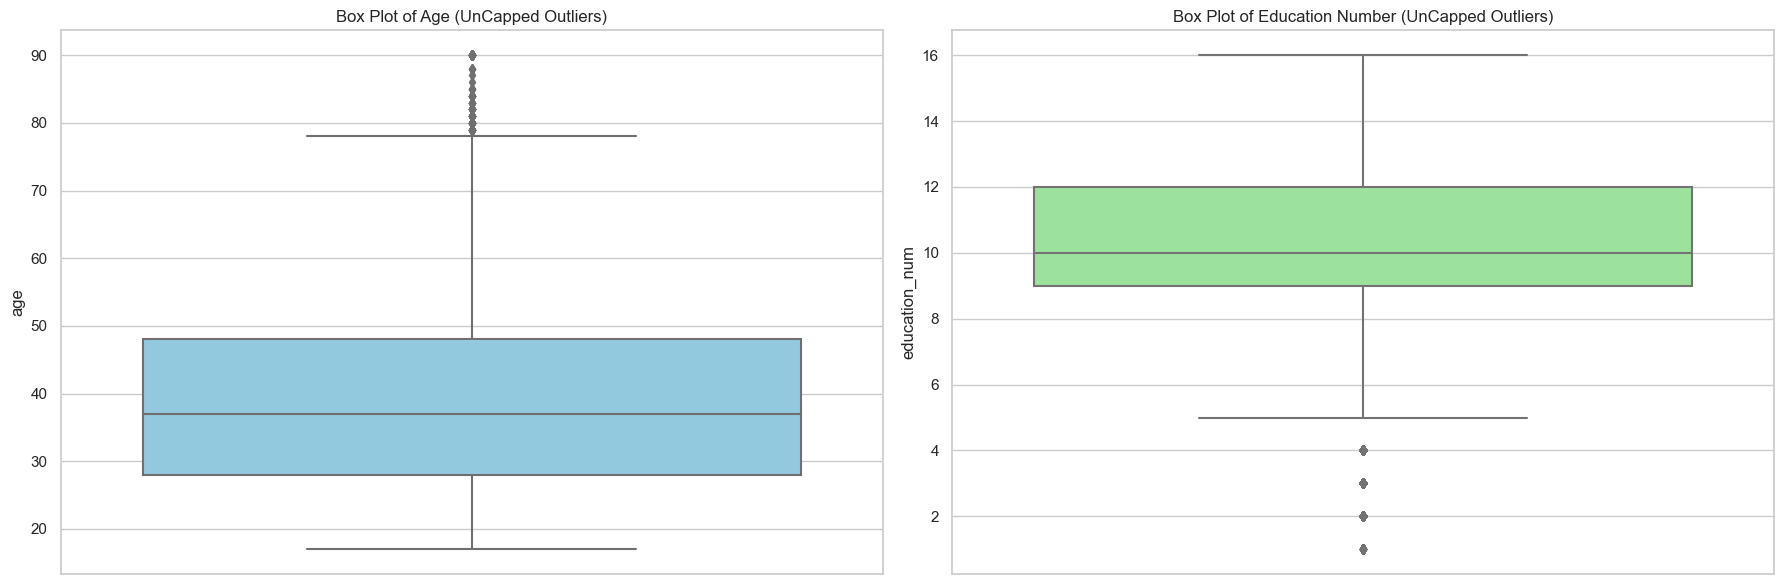

In [70]:
# Displaying box plots for the capped features to verify before outlier treatment
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=data_df, y='age', ax=ax[0], color='skyblue')
ax[0].set_title('Box Plot of Age (UnCapped Outliers)')

sns.boxplot(data=data_df, y='education_num', ax=ax[1], color='lightgreen')
ax[1].set_title('Box Plot of Education Number (UnCapped Outliers)')

plt.tight_layout()
plt.show()

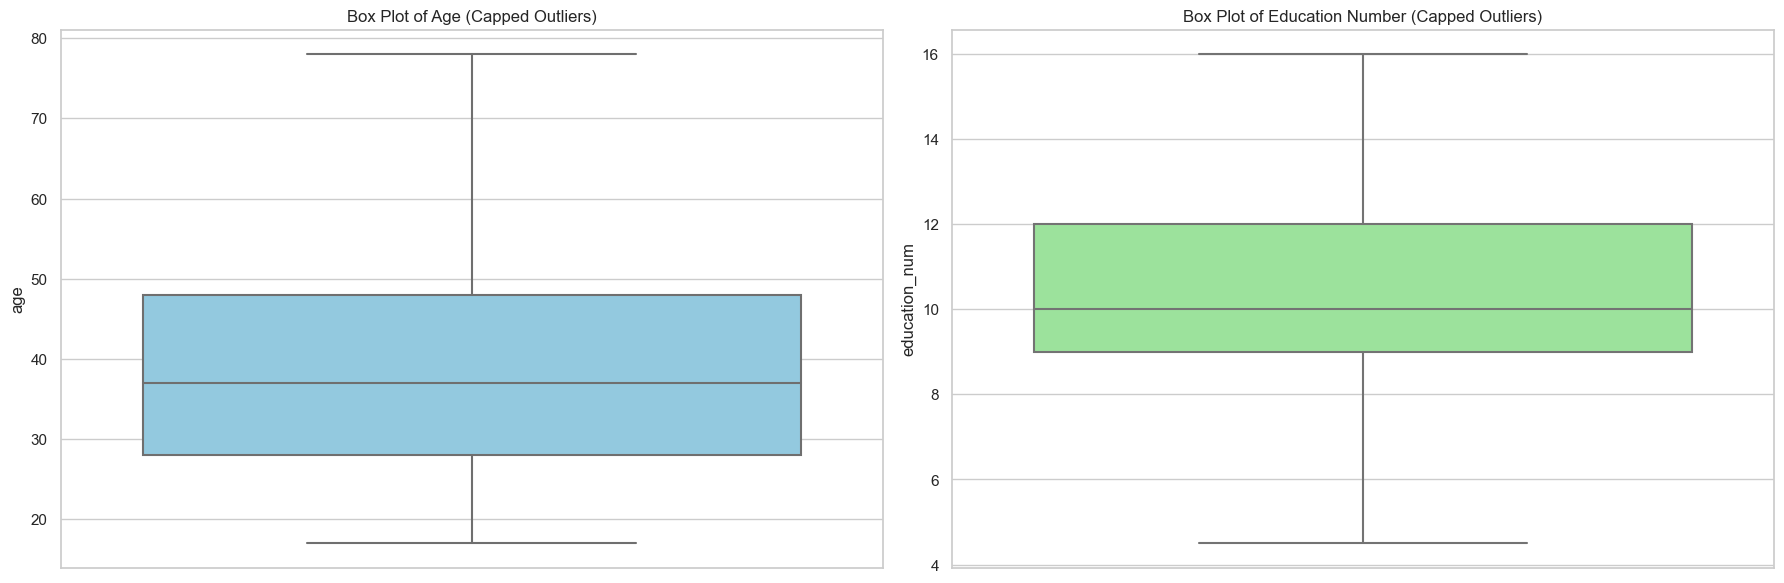

In [71]:
# Function to cap outliers based on the IQR method
def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])
    return df

# Capping outliers for 'age' and 'education_num'
data_df = cap_outliers(data_df, 'age')
data_df = cap_outliers(data_df, 'education_num')

# Repeating the process for the test dataset to maintain consistency
test_df = cap_outliers(test_df, 'age')
test_df = cap_outliers(test_df, 'education_num')

# Displaying box plots for the capped features to verify the effect of outlier treatment
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=data_df, y='age', ax=ax[0], color='skyblue')
ax[0].set_title('Box Plot of Age (Capped Outliers)')

sns.boxplot(data=data_df, y='education_num', ax=ax[1], color='lightgreen')
ax[1].set_title('Box Plot of Education Number (Capped Outliers)')

plt.tight_layout()
plt.show()


The box plots for `age` and `education_num` after capping outliers show that the extreme values have been adjusted to within the defined thresholds, effectively mitigating the impact of outliers in these features. This treatment retains the data points while reducing the potential distortion caused by extreme values in the dataset.

In [72]:
data_df

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,capital_gain_log,capital_loss_log
0,39.0,State-gov,77516,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,7.684784,0.0
1,50.0,Self-emp-not-inc,83311,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.000000,0.0
2,38.0,Private,215646,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.000000,0.0
3,53.0,Private,234721,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0
4,28.0,Private,338409,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0.000000,0.0
32557,40.0,Private,154374,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0.000000,0.0
32558,58.0,Private,151910,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0.000000,0.0
32559,22.0,Private,201490,9.0,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0.000000,0.0
